In [1]:
class ListStack:	# 후입후출 (LIFO)
	def __init__(self):
		self.__stack = []

	def push(self, x):	# 스택에 원소 삽입하기 (맨 끝에 원소 삽입됨)
		self.__stack.append(x)

	def pop(self):	# 스탹에서 원소 삭제하기 (맨 끝 원소 삭제)
		return self.__stack.pop() # .pop(): 리스트의 끝(top) 원소를 삭제한 후 원소 리턴

	def top(self):	# 스택 맨 끝 원소 알려주기
		if self.isEmpty():
			return None
		else:
			return self.__stack[-1]

	def isEmpty(self) -> bool:	# 스택이 비었는지 확인하기
		return not bool(self.__stack)

	def popAll(self):	# 스택 비우기
		self.__stack.clear() 

	def printStack(self):	# 스택 전체 출력하기 (멘 위에서부터)
		print("Stack from top:", end = ' ')
		for i in range(len(self.__stack)-1, -1, -1):
			print(self.__stack[i], end = ' ')
		print()

In [23]:
class ListNode:
	def __init__(self, newItem, nextNode:'ListNode'):
		self.item = newItem
		self.next = nextNode

class LinkedListBasic:
	def __init__(self):
		self.__head = ListNode('dummy', None)
		self.__numItems = 0

	# [알고리즘 5 - 2] 구현: 연결 리스트에 원소 삽입하기(더미 헤드를 두는 대표 버전)
	def insert(self, i:int, newItem):
		if i >= 0 and i <= self.__numItems:
			prev = self.__getNode(i - 1)
			newNode = ListNode(newItem, prev.next)
			prev.next = newNode
			self.__numItems += 1
		else:
			print("index", i, ": out of bound in insert()") # 필요 시 에러 처리
 
	def append(self, newItem):
		prev = self.__getNode(self.__numItems - 1)
		newNode = ListNode(newItem, prev.next)
		prev.next = newNode
		self.__numItems += 1

	# [알고리즘 5-3] 구현: 연결 리스트의 원소 삭제하기
	def pop(self, i:int):   # i번 노드 삭제. 고정 파라미터
		if (i >= 0 and i <= self.__numItems-1):
			prev = self.__getNode(i - 1)
			curr = prev.next
			prev.next = curr.next
			retItem = curr.item
			self.__numItems -= 1
			return retItem
		else:
			return None
	
	# [알고리즘 5 -4] 구현: 연결 리스트의 원소 x 삭제하기 (더미 헤드를 두는 대표 버전)
	def remove(self, x):
		(prev, curr) = self.__findNode(x)
		if curr != None:
			prev.next = curr.next
			self.__numItems -= 1
			return x
		else:
			return None

	# [알고리즘 5 - 5] 구현: 연결 리스트의 i번 원소 알려주기
	def get(self, i:int):
		if self.isEmpty():
			return None
		if (i >= 0 and i <= self.__numItems - 1):
			return self.__getNode(i).item
		else:
			return None
 
	# [알고리즘 5 -7] 구현: x가 연결 리스트의 몇 번 원소인지 알려주기
	def index(self, x) -> int:
		curr = self.__head.next	 # 0번 노드:  더미 헤드 다음 노드
		for index in range(self.__numItems):
			if curr.item == x:
				return index
			else:
				curr = curr.next
		return -2 # 안 쓰는 인덱스

	# [알고리즘 5 -8] 구현: 기타 작업들
	def isEmpty(self) -> bool:
		return self.__numItems == 0

	def size(self) -> int:
		return self.__numItems

	def clear(self):
		self.__head = ListNode("dummy", None)
		self.__numItems = 0

	def count(self, x) -> int:
		cnt = 0
		curr = self.__head.next  # 0번 노드
		while curr != None:
			if curr.item == x:
					cnt += 1
			curr = curr.next
		return cnt

	def extend(self, a): # 여기서 a는 self와 같은 타입의 리스트
		for index in range(a.size()):
			self.append(a.get(index))
 
	def copy(self):
		a = LinkedListBasic()
		for index in range(self.__numItems):
			a.append(self.get(index))
		return a

	def reverse(self):
		a = LinkedListBasic()
		for index in range(self.__numItems):
			a.insert(0, self.get(index))
		self.clear()
		for index in range(a.size()):
			self.append(a.get(index))

	def sort(self) -> None:
		a = []
		for index in range(self.__numItems):
			a.append(self.get(index))
		a.sort()
		self.clear()
		for index in range(len(a)):
			self.append(a[index])
 
	def __findNode(self, x) -> (ListNode, ListNode):
		prev = self.__head  # 더미 헤드
		curr = prev.next    # 0번 노드
		while curr != None:
			if curr.item == x:
				return (prev, curr)
			else:
				prev = curr; curr = curr.next
		return (None, None)

	# [알고리즘 5-6] 구현: 연결 리스트의 i번 노드 알려주기
	def __getNode(self, i:int) -> ListNode:
		curr = self.__head # 더미 헤드, index: -1
		for index in range(i+1):
			curr = curr.next
		return curr

	def printList(self):
		curr = self.__head.next # 0번 노드: 더미 헤드 다음 노드
		while curr != None:
			print(curr.item, end = ' ')
			curr = curr.next
		print()
	
class LinkedStack:	# 연결 리스트 스택
	def __init__(self):	# 연결 리스트로 구현
		self.__list = LinkedListBasic()

	def push(self, newItem):	# 스택 맨 위에 원소 삽입하기
		self.__list.insert(0, newItem)

	def pop(self):	# 스택에서 원소 삭제하기
		return self.__list.pop(0)

	def top(self):	# 스택의 맨 위 원소 알려주기 (인덱스로 접근 불가)
		if self.isEmpty():	# .get(0): 리스트의 맨 위 원소 리턴
			return None
		else:
			return self.__list.get(0)

	def isEmpty(self) -> bool:	# 스택이 비었는지 확인하기
		return self.__list.isEmpty()

	def popAll(self):	# 스택 비우기
		self.__list.clear()

	def printStack(self):	# 스택 전체 출력하기 (맨 위부터)
		print("Stack from top:", end = '')
		for i in range(self.__list.size()):
			print(self.__list.get(i), end = '')
		print()


## 2번 문제

## 3번 문제

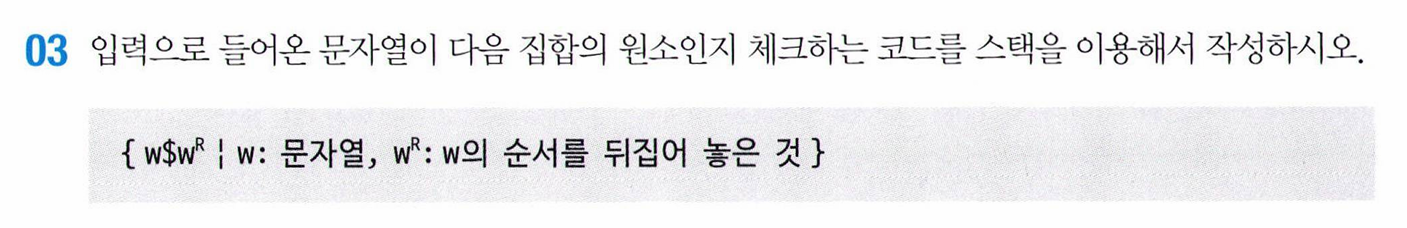

In [59]:
def backwards(s: str) -> bool:
   st = ListStack()
   index = 0
   while s[index] != '$':   # $ 전까지 st로 push하기
       st.push(s[index])    
       index += 1
   index += 1   # $의 인덱스 건너뛰기
   while index < len(s):
       if st.pop() != s[index]: # st의 맨 위 원소와 s의 $ 뒷부분 비교
           return False
       else:
           index += 1
   return st.isEmpty()  # 다 비어있으면 True 반환
backwards("abc$cba")

True

## 4번 문제

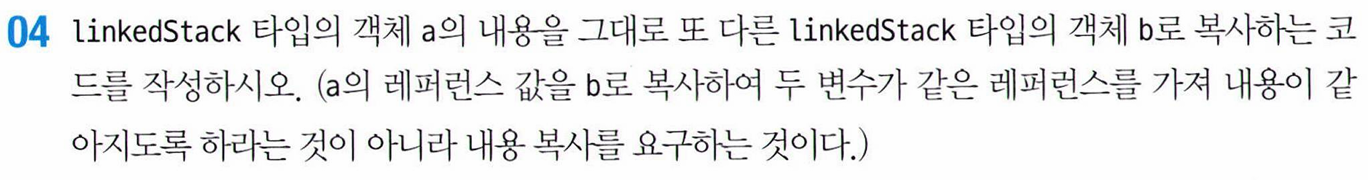

In [24]:
def copy(a:'LinkedStack', b:'LinkedStack') :
    b.popAll()
    new = LinkedStack()
    while not a.isEmpty():
        new.push(a.pop())   # a의 맨 뒤부터 제거삽입
    while new.isEmpty() :
        a.push(new.top())
        b.push(new.pop())

In [49]:
def copy(a: 'LinkedStack', b: 'LinkedStack'):
    b.popAll() # 리스트 비우기
    tmp = LinkedStack() # 역순 저장할 리스트 생성

    # a -> tmp (a는 비워지고, tmp에는 역순으로 쌓임)
    while not a.isEmpty():
        tmp.push(a.pop())   # a에서 제거한 값을 tmp에 저장

    # tmp -> a, b (a를 원래 순서로 복구 + b에도 같은 순서로 복사)
    while not tmp.isEmpty():
        x = tmp.pop()      # ← 한 번만 pop 해서
        a.push(x)          #    a에 넣고
        b.push(x)          #    b에도 넣기

a = LinkedStack()
b = LinkedStack()

for ch in "ddong": 
    a.push(ch) 

copy(a, b) 
a.printStack()
b.printStack()

Stack from top:gnodd
Stack from top:gnodd


## 5번 문제

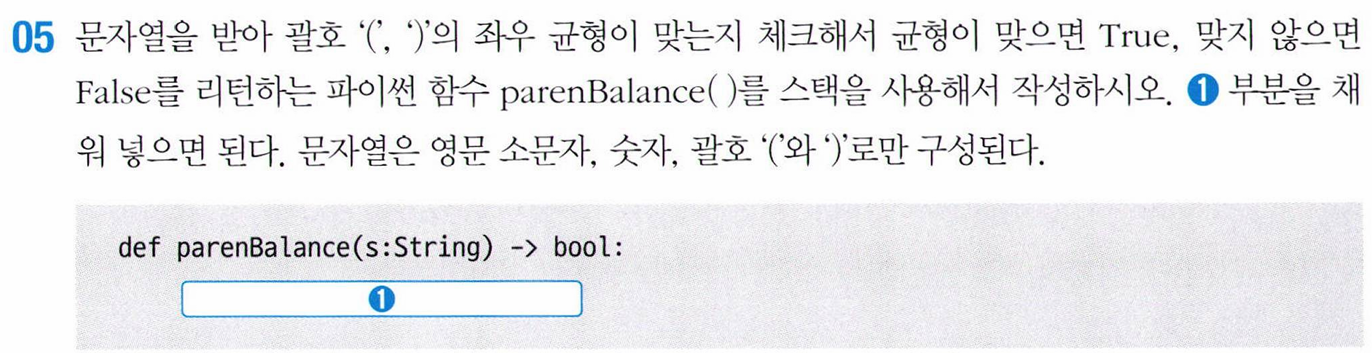

In [ ]:
# 답
def parenBalance(s:str) -> bool:
    st = ListStack()
    for i in s :
        if i == '(' :
            st.push('(')   # 스택에 추가
        elif i == ')' :
            if st.isEmpty() :
                return False
            st.pop()
    return st.isEmpty()

In [ ]:
# 확인
st1 = parenBalance("c(123)")
print(st1)

True


# 큐

In [60]:
class ListQueue:	# 선입선출 (FIFO)
	def __init__(self):
		self.__queue = []

	def enqueue(self, x):	# 큐에 원소 x 삽입하기 (맨 끝에 원소 삽입됨)
		self.__queue.append(x)

	def dequeue(self):	# 큐에서 원소 x 삭제하기 
		return self.__queue.pop(0) # .pop(0): 리스트의 첫 원소를 삭제한 후 원소 리턴

	def front(self):	# 큐의 맨 앞 원소 알려주기
		if self.isEmpty():
			return None
		else:
			return self.__queue[0]

	def isEmpty(self) -> bool:	# 큐가 비었는지 확인하기
		return (len(self.__queue) == 0)
 
	def dequeueAll(self):	# 큐 비우기
		self.__queue.clear()

	def printQueue(self):	# 큐 전체 출력하기
		print("Queue from front:", end = ' ')
		for i in range(len(self.__queue)):
			print(self.__queue[i], end = ' ')
		print()

In [75]:
class CircularLinkedList:
	def __init__(self):
		self.__tail = ListNode("dummy", None)
		self.__tail.next = self.__tail
		self.__numItems = 0

	def insert(self, i:int, newItem) -> None:
		if (i >= 0 and i <= self.__numItems):
			prev = self.getNode(i - 1)
			newNode = ListNode(newItem, prev.next)
			prev.next = newNode
			if i == self.__numItems:
				self.__tail = newNode
			self.__numItems += 1
		else:
			print("index", i, ": out of bound in insert()") # 필요 시 에러 처리

	def append(self, newItem) -> None:
		newNode = ListNode(newItem, self.__tail.next)
		self.__tail.next = newNode
		self.__tail = newNode
		self.__numItems += 1

	def pop(self, *args):
		# 가변 파라미터. 인자가 없거나 -1이면 마지막 원소로 처리하기 위함. 파이썬 리스트 규칙 만족
		if self.isEmpty():
			return None
		# 인덱스 i 결정
		if len(args) != 0: # pop(k)과 같이 인자가 있으면 i = k 할당
			i = args[0]
		if len(args) == 0 or i == -1:# pop()에 인자가 없거나 pop(-1)이면 i에 맨 끝 인덱스 할당
			i = self.__numItems - 1
		# i번 원소 삭제
		if (i >= 0 and i <= self.__numItems - 1):
			prev = self.getNode(i - 1)
			retItem = prev.next.item
			prev.next = prev.next.next
			if i == self.__numItems - 1:	
				self.__tail = prev		  
			self.__numItems -= 1
			return retItem
		else:
			return None

	def remove(self, x):
		(prev, curr) = self.__findNode(x)
		if curr != None:
			prev.next = curr.next
			if curr == self.__tail:	 
				self.__tail = prev	  
			self.__numItems -= 1
			return x
		else:
			return None

	def get(self, *args):
	# 가변 파라미터. 인자가 없거나 -1이면 마지막 원소로 처리하기 위함. 파이썬 리스트 규칙 만족
		if self.isEmpty():
			return None
		# 인덱스 i 결정
		if len(args) != 0: # pop(k)과 같이 인자가 있으면 i = k 할당
			i = args[0]
		if len(args) == 0 or i == -1:# pop()에 인자가 없거나 pop(-1)이면 i에 맨 끝 인덱스 할당
			i = self.__numItems - 1
		# i번 원소 리턴
		if (i >= 0 and i <= self.__numItems - 1):
			return self.getNode(i).item
		else:
			return None

	def index(self, x) -> int:
		cnt = 0
		for element in self:
			if element == x:
				return cnt
			cnt += 1
		return -12345

	def isEmpty(self) -> bool:
		return self.__numItems == 0

	def size(self) -> int:
		return self.__numItems

	def clear(self):
		self.__tail = ListNode("dummy", None)
		self.__tail.next = self.__tail
		self.__numItems = 0

	def count(self, x) -> int:
		cnt = 0
		for element in self:
			if element == x:
					cnt += 1
		return cnt

	def extend(self, a): # a는 순회 가능한 모든 객체
		for x in a:
			self.append(x)
 
	def copy(self) -> b'CircularLinkedList':
		a = CircularLinkedList()
		for element in self:
			a.append(element)
		return a

	def reverse(self) -> None:
		__head = self.__tail.next  # 더미 헤드
		prev = __head; curr = prev.next; next = curr.next
		curr.next = __head; __head.next = self.__tail; self.__tail = curr
		for i in range(self.__numItems - 1):
			prev = curr; curr = next; next = next.next
			curr.next = prev

	def sort(self) -> None:
		a = []
		for element in self:
			a.append(element)
		a.sort() 
		self.clear()
		for element in a:
			self.append(element)

	def __findNode(self, x) -> (ListNode, ListNode):
		__head = prev = self.__tail.next  # 더미 헤드
		curr = prev.next  # 0번 노드
		while curr != __head:
			if curr.item == x:
				return (prev, curr)
			else:
				prev = curr; curr = curr.next
		return (None, None)
 
	def getNode(self, i:int) -> ListNode:
		curr = self.__tail.next  # 더미 헤드, index: -1
		for index in range(i+1):
			curr = curr.next
		return curr

	def printList(self) -> None:
		for element in self:
			print(element, end = ' ')
		print()

	def __iter__(self):  # generating iterator and return
		return CircularLinkedListIterator(self)

class CircularLinkedListIterator:
	def __init__(self, alist):
		self.__head = alist.getNode(-1)  # 더미 헤드
		self.iterPosition = self.__head.next  # 0번 노드
	def __next__(self):
		if self.iterPosition == self.__head: # 순환 끝
			raise StopIteration
		else: # 현재 원소를 리턴하면서 다음 원소로 이동
			item = self.iterPosition.item
			self.iterPosition = self.iterPosition.next
			return item

class LinkedQueue:	# 연결 리스트 큐
	def __init__(self):	# 원형 연결 라스트로 구현
		self.__queue = CircularLinkedList()

	def enqueue(self, x):	# 큐에 원소 삽입하기
		self.__queue.append(x)

	def dequeue(self):	# 큐에서 원소 삭제하기
		return self.__queue.pop(0)	# .pop(0): 리스트의 첫 원소를 삭제한 후 원소 리턴

	def front(self):	# 큐의 맨 앞 원소 알려주기 (인덱스로 접근 불가)
		return self.__queue.get(0)	 # .get(0): 리스트의 첫 원소 리턴

	def isEmpty(self) -> bool:	# 큐가 비었는지 확인하기
		return self.__queue.isEmpty()
 
	def dequeueAll(self):	# 큐 비우기
		self.__queue.clear()
  
	def printQueue(self):	# 큐 전체 출력하기
		print("Queue from front:", end = ' ')
		for i in range(self.__queue.size()):
			print(self.__queue.get(i), end = '')
		print()

## 2번 문제

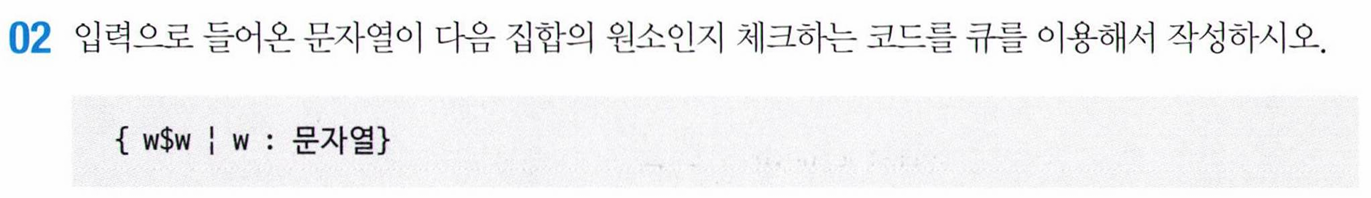

In [66]:
def backwards(s: str) :
    st = ListQueue()
    index = 0
    while not (s[index] == '$') :
        st.enqueue(s[index])
        index += 1
    index += 1
    while index < len(s) :
        if (st.dequeue() != s[index]) :
            return False
        else :
            index += 1
    return st.isEmpty()
backwards("abc$abc")

True

## 3번 문제

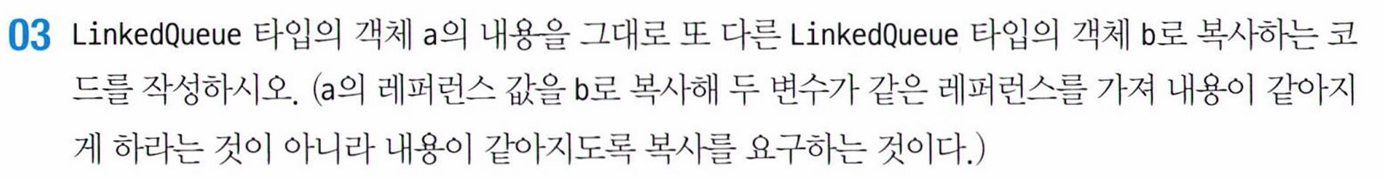

In [76]:
def copy(a:'LinkedQueue', b:'LinkedQueue') :
    b.dequeueAll()
    tmp = LinkedQueue() # a를 역순 저장할 연결리스트

    while not a.isEmpty():
        x = a.dequeue()
        tmp.enqueue(x)   # a를 보존하기 위한 임시 보관
        b.enqueue(x)     # 복사본 b에 저장

    # 2) tmp에 보관한 것을 다시 a로 되돌려서 a를 원상복구
    while not tmp.isEmpty():
        a.enqueue(tmp.dequeue())
a = LinkedQueue()
b = LinkedQueue()

for i in "dong" :
    a.enqueue(i)
    
copy(a, b)
a.printQueue()
b.printQueue()

Queue from front: dong
Queue from front: dong


## 4번 문제

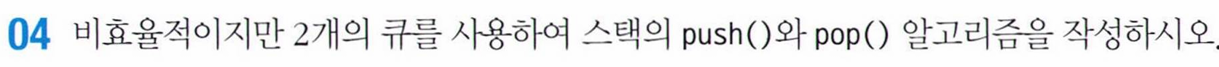

In [83]:
def push(q1: 'LinkedQueue', q2: 'LinkedQueue', item):
    # q2 <- item 먼저, 그 다음 q1의 기존 원소들을 모두 뒤에 붙인다
    q2.dequeueAll()
    q2.enqueue(item)
    while not q1.isEmpty():
        q2.enqueue(q1.dequeue())
    # q1, q2 스왑 (q1이 항상 실제 큐가 되도록)
    while not q2.isEmpty():
        q1.enqueue(q2.dequeue())
    # 결과: q1.front가 스택 top

def pop(q1: 'LinkedQueue', q2: 'LinkedQueue'):
    if q1.isEmpty():
        return None
    return q1.dequeue()  # top = q1.front

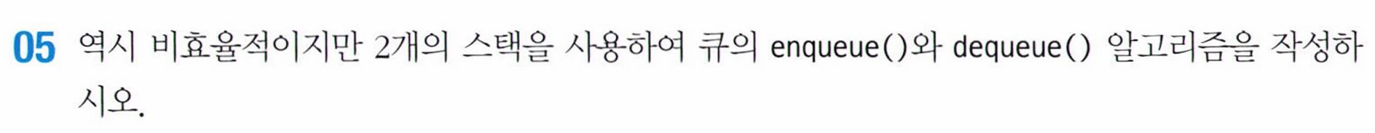

In [ ]:
def enqueue(s1: 'LinkedStack', s2: 'LinkedStack', item):
    # s1의 기존 원소를 s2로 모두 옮김
    while not s1.isEmpty():
        s2.push(s1.pop())
    # 새 원소를 s1에 넣고
    s1.push(item)
    # s2에 있던 것들을 다시 s1로
    while not s2.isEmpty():
        s1.push(s2.pop())
    # 불변식: s1.top == queue.front

def dequeue(s1: 'LinkedStack', s2: 'LinkedStack'):
    if s1.isEmpty():
        return None
    return s1.pop()          # front를 반환 (O(1))